In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from hyperopt import hp, tpe, Trials, fmin, STATUS_OK

In [2]:
data = np.load('Wafer_data/Wafer_Map_Datasets.npz')
X = data['arr_0'] #Images
y = data['arr_1'] #Labels

#Flatten the images
X = X.reshape(X.shape[0], -1)

In [3]:
#Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 1000, 1),
    'learning_rate': hp.loguniform('learning_rate', -5, -1),
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
}

In [5]:
def objective(params):
    params['n_estimators'] = int(params['n_estimators'])
    params['max_depth'] = int(params['max_depth'])

    xgb_model = XGBClassifier(n_estimators=params['n_estimators'], learning_rate=params['learning_rate'], max_depth=params['max_depth'], random_state=0, tree_method='gpu_hist', predictor='gpu_predictor')
    xgb_model.fit(X_train, y_train)

    #Predicting the test set results
    y_pred = xgb_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return{'loss': -acc, 'status': STATUS_OK}

In [6]:
#Run the HPO
trials = Trials()
best_params = fmin(fn = objective, space = space, algo = tpe.suggest, max_evals = 50, trials = trials, rstate=np.random.default_rng(0))

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:52:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:52:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

  2%|▏         | 1/50 [02:49<2:18:01, 169.01s/trial, best loss: -0.7825858213862948]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:55:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:55:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

  4%|▍         | 2/50 [07:07<2:57:13, 221.54s/trial, best loss: -0.8432197816651322]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:59:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:59:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

  6%|▌         | 3/50 [11:31<3:08:43, 240.93s/trial, best loss: -0.8967512823885309]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:04:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:04:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

  8%|▊         | 4/50 [15:43<3:08:06, 245.36s/trial, best loss: -0.9072734446928844]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:08:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:08:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 10%|█         | 5/50 [22:20<3:44:56, 299.91s/trial, best loss: -0.9072734446928844]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:15:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:15:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 12%|█▏        | 6/50 [27:47<3:46:43, 309.17s/trial, best loss: -0.9072734446928844]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:20:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:20:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 14%|█▍        | 7/50 [40:33<5:28:33, 458.46s/trial, best loss: -0.9072734446928844]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:33:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:33:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 16%|█▌        | 8/50 [41:19<3:49:05, 327.27s/trial, best loss: -0.9072734446928844]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:34:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:34:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 18%|█▊        | 9/50 [43:34<3:02:32, 267.14s/trial, best loss: -0.9072734446928844]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:36:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:36:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 20%|██        | 10/50 [45:35<2:28:03, 222.08s/trial, best loss: -0.9072734446928844]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:38:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:38:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 22%|██▏       | 11/50 [48:20<2:13:04, 204.72s/trial, best loss: -0.9072734446928844]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:41:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:41:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 24%|██▍       | 12/50 [52:16<2:15:40, 214.22s/trial, best loss: -0.9072734446928844]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:45:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:45:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 26%|██▌       | 13/50 [57:30<2:30:38, 244.28s/trial, best loss: -0.9072734446928844]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:50:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:50:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 28%|██▊       | 14/50 [1:05:33<3:09:54, 316.51s/trial, best loss: -0.9072734446928844]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:58:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:58:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 30%|███       | 15/50 [1:17:28<4:14:43, 436.68s/trial, best loss: -0.9072734446928844]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:10:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:10:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 32%|███▏      | 16/50 [1:21:49<3:37:22, 383.60s/trial, best loss: -0.9076680257792976]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:14:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:14:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 34%|███▍      | 17/50 [1:22:21<2:32:52, 277.95s/trial, best loss: -0.9076680257792976]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:15:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:15:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 36%|███▌      | 18/50 [1:23:42<1:56:44, 218.90s/trial, best loss: -0.9076680257792976]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:16:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:16:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 38%|███▊      | 19/50 [1:31:29<2:31:34, 293.38s/trial, best loss: -0.9076680257792976]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:24:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:24:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 40%|████      | 20/50 [1:34:16<2:07:43, 255.44s/trial, best loss: -0.9116138366434302]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:27:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:27:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 42%|████▏     | 21/50 [1:37:23<1:53:27, 234.73s/trial, best loss: -0.9116138366434302]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:30:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:30:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 44%|████▍     | 22/50 [1:42:36<2:00:28, 258.17s/trial, best loss: -0.9116138366434302]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:35:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:35:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 46%|████▌     | 23/50 [1:45:46<1:46:58, 237.74s/trial, best loss: -0.9116138366434302]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:38:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:38:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 48%|████▊     | 24/50 [1:47:32<1:25:54, 198.25s/trial, best loss: -0.9116138366434302]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:40:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:40:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 50%|█████     | 25/50 [1:50:52<1:22:52, 198.92s/trial, best loss: -0.9116138366434302]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:43:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:43:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 52%|█████▏    | 26/50 [1:51:12<58:03, 145.14s/trial, best loss: -0.9116138366434302]  

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:43:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:43:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 54%|█████▍    | 27/50 [1:54:44<1:03:19, 165.20s/trial, best loss: -0.9116138366434302]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:47:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:47:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 56%|█████▌    | 28/50 [1:58:12<1:05:18, 178.09s/trial, best loss: -0.9116138366434302]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:50:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:50:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 58%|█████▊    | 29/50 [2:02:08<1:08:23, 195.41s/trial, best loss: -0.9116138366434302]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:54:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:54:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 60%|██████    | 30/50 [2:02:58<50:36, 151.83s/trial, best loss: -0.9116138366434302]  

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:55:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:55:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 62%|██████▏   | 31/50 [2:03:37<37:23, 118.08s/trial, best loss: -0.9116138366434302]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:56:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:56:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 64%|██████▍   | 32/50 [2:10:32<1:02:04, 206.94s/trial, best loss: -0.9116138366434302]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:03:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:03:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 66%|██████▌   | 33/50 [2:13:59<58:41, 207.13s/trial, best loss: -0.9116138366434302]  

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:06:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:06:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 68%|██████▊   | 34/50 [2:16:45<51:56, 194.78s/trial, best loss: -0.9116138366434302]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:09:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:09:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 70%|███████   | 35/50 [2:23:14<1:03:16, 253.12s/trial, best loss: -0.9116138366434302]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:15:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:15:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 72%|███████▏  | 36/50 [2:27:01<57:13, 245.22s/trial, best loss: -0.9116138366434302]  

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:19:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:19:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 74%|███████▍  | 37/50 [2:30:07<49:16, 227.42s/trial, best loss: -0.9116138366434302]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:22:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:22:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 76%|███████▌  | 38/50 [2:34:31<47:40, 238.36s/trial, best loss: -0.9116138366434302]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:27:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:27:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 78%|███████▊  | 39/50 [2:38:04<42:18, 230.78s/trial, best loss: -0.9116138366434302]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:30:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:30:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 80%|████████  | 40/50 [2:39:56<32:30, 195.05s/trial, best loss: -0.9116138366434302]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:32:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:32:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 82%|████████▏ | 41/50 [2:44:47<33:35, 223.97s/trial, best loss: -0.9116138366434302]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:37:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:37:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 84%|████████▍ | 42/50 [2:47:58<28:31, 213.89s/trial, best loss: -0.9116138366434302]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:40:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:40:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 86%|████████▌ | 43/50 [2:50:52<23:33, 201.98s/trial, best loss: -0.9116138366434302]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:43:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:43:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 88%|████████▊ | 44/50 [2:56:02<23:26, 234.46s/trial, best loss: -0.9116138366434302]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:48:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:48:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 90%|█████████ | 45/50 [2:58:36<17:31, 210.31s/trial, best loss: -0.9116138366434302]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:51:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:51:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 92%|█████████▏| 46/50 [3:03:10<15:17, 229.42s/trial, best loss: -0.9116138366434302]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:55:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:55:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 94%|█████████▍| 47/50 [3:05:16<09:55, 198.49s/trial, best loss: -0.9116138366434302]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:58:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:58:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 96%|█████████▌| 48/50 [3:11:20<08:15, 247.93s/trial, best loss: -0.9116138366434302]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:04:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:04:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

 98%|█████████▊| 49/50 [3:12:28<03:14, 194.15s/trial, best loss: -0.9116138366434302]

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:05:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:05:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [1

100%|██████████| 50/50 [3:17:40<00:00, 237.21s/trial, best loss: -0.9116138366434302]


In [7]:
print("Best Hyperparameters: ", best_params)

Best Hyperparameters:  {'learning_rate': np.float64(0.17062085581816447), 'max_depth': np.float64(6.0), 'n_estimators': np.float64(511.0)}


In [8]:
#Training the best model
best_xgb_model = XGBClassifier(n_estimators=int(best_params['n_estimators']), learning_rate=best_params['learning_rate'], max_depth=int(best_params['max_depth']), random_state=0, tree_method='gpu_hist', predictor='gpu_predictor')
best_xgb_model.fit(X_train, y_train)

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:26:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:26:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None,
              learning_rate=np.float64(0.17062085581816447), max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=511, n_jobs=None,
              num_parallel_tree=None, predictor='gpu_predictor', ...)

In [9]:
#Making predictions
y_pred_final = best_xgb_model.predict(X_test)
best_acc = accuracy_score(y_test, y_pred_final)
print(f"Accuracy: {best_acc * 100:.2f}%")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_final))

c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:27:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Accuracy: 91.16%

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2571
           1       1.00      0.99      1.00      2443
           2       1.00      0.94      0.97      2567
           3       0.98      1.00      0.99      2393
           4       1.00      0.93      0.96      3613
           5       1.00      0.75      0.86        32
           6       0.98      0.97      0.98      3813
           7       0.96      1.00      0.98       164

   micro avg       0.99      0.97      0.98     17596
   macro avg       0.99      0.95      0.96     17596
weighted avg       0.99      0.97      0.98     17596
 samples avg       0.96      0.94      0.95     17596



c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `

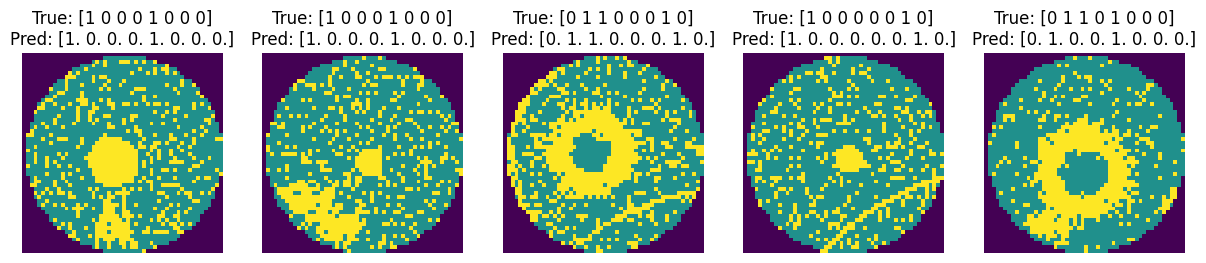

In [ ]:
def visualize_results(X_test, y_test, y_pred, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        ax = plt.subplot(1, num_images, i + 1)
        plt.imshow(X_test[i].reshape(52,52))
        plt.title(f"True: {y_test[i]}\nPred: {y_pred[i]}")
        plt.axis('off')
    plt.show()

visualize_results(X_test, y_test, y_pred_final)

In [ ]:
import joblib

#Saving Model to external file
joblib.dump(best_xgb_model, 'best_xgb_model.pkl')

['best_xgb_model.pkl']